In [1]:
import os
import glob
from utils.reference_fronts import ReferenceFronts
from utils.file_utils import parse_exp_log_dir, load_n_evaluation_log, parse_meta
from utils.performance_evaluator import PerformanceEvaluator
import pandas as pd

search_dir = "../data"
exp_dir_pattern = "N-obj"

subdirs = [os.path.join(search_dir,d) for d in os.listdir(search_dir) if os.path.isdir(os.path.join(search_dir, d)) and d.startswith(exp_dir_pattern)]


meta_list = []
for subdir in subdirs:
    meta_list.append(parse_meta(exp_dir=subdir))
    
exp_df = pd.DataFrame(meta_list)

pe = PerformanceEvaluator()


In [20]:
dimensions = [2]
n_objectives = [3,4,5]
trees = ["breadth.json"]
solvers = ["GDE3"]

filtered_exps = []
for _,row in exp_df.iterrows():
    for dimension in dimensions:
        for n_objective in n_objectives:
            for tree in trees:
                for solver in solvers:
                    if row["dimension"] == dimension and row["n_objectives"] == n_objective and row["tree"] == tree and row["solver"] == solver:
                        filtered_exps.append(row)
filtered_exps = pd.DataFrame(filtered_exps)

In [21]:
var_keys = "n_objectives"
res_dict = {}

for _,row in filtered_exps.iterrows():
    eval_info = pe.get_evaluation_info(exp_dir=row["exp_dir"])
    print(row["solver"])
    generation_index = 1
    res = []
    for start_step in range(0,100000, 100):
        generation_design_variables = eval_info["design_variables"][start_step:start_step+100]
        generation_objective_values = eval_info["objective_values"][start_step:start_step+100]
        gd = pe.compute_indicator(reference_set=eval_info["references"]["all_sets"],reference_front=eval_info["references"]["all_fronts"],actual_set=generation_design_variables,actual_front=generation_objective_values,indicator_type="GD")
        igd = pe.compute_indicator(reference_set=eval_info["references"]["all_sets"],reference_front=eval_info["references"]["all_fronts"],actual_set=generation_design_variables,actual_front=generation_objective_values,indicator_type="IGD")
        res.append({"generation_index":generation_index, "gd_set":gd["set_indicator"],"igd_set":igd["set_indicator"], "gd_front":gd["front_indicator"],"igd_front":igd["front_indicator"]})
        generation_index +=1
    res_dict[eval_info[var_keys]] = res
        

2024-09-18 15:45:37,475 - INFO - file_utils - Loading data from disk, file size 16578462
2024-09-18 15:45:37,554 - INFO - file_utils - Load complete, processing ...... 


GDE3


2024-09-18 15:45:38,048 - INFO - file_utils - Loading data from disk, file size 19554720
2024-09-18 15:45:38,160 - INFO - file_utils - Load complete, processing ...... 


GDE3


2024-09-18 15:45:42,707 - INFO - file_utils - Loading data from disk, file size 22267713
2024-09-18 15:45:42,829 - INFO - file_utils - Load complete, processing ...... 


GDE3


KeyError: 'GDE3'

In [24]:
from matplotlib import pyplot as plt

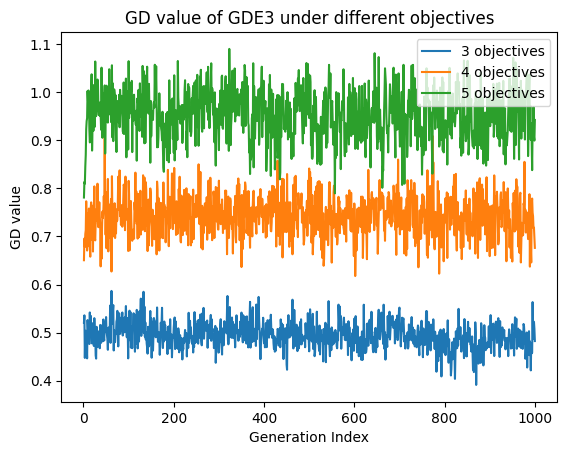

In [37]:
for index_key in [3,4,5]:
    current_df = pd.DataFrame(res_dict[index_key])
    x_axis = current_df.generation_index
    y_1 = current_df.gd_front
    plt.plot(x_axis, y_1, label=f'{index_key} objectives')
    
plt.xlabel('Generation Index')
plt.ylabel('GD value')
plt.title(f"GD value of GDE3 under different objectives")
plt.legend()